In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import re
import glob
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
resultsPathC = 'c.log'
resultsPathI = 'i.log'

# Notes
Look at performance of all groups over n rounds and see if anything cool.
Then look at what our players are doing over time in some of the rounds we perform poorly in.

In [3]:
def readResults(resultsPath):
    dictFunc = lambda: {'3':[], '10':[], '30':[], '101':[], '200':[], '1000':[]}
    resultsDict = {'g2c':dictFunc(), 'g5c':dictFunc(), 'g8c':dictFunc(), 'g7c':dictFunc(), 'g9c':dictFunc()}
    groupRegex = r'g\dc'
    roundRegex = r'\s\d+\s'
    turnsRegex = r'\d+'
    with open(resultsPath, 'r') as resultsFile:
        currGroup = ''
        currRounds = ''
        for line in resultsFile:
            myMatch = re.search(pattern = groupRegex, string = line)
            if myMatch:
#                 print(line)
                myMatch.group()
                group = myMatch.group()
                rounds =  re.search(pattern = roundRegex, string = line).group().strip()
#                 print(group)
#                 print(rounds)
                for i in np.arange(0,9):
                    next(resultsFile)
#                 print(line)
                line = resultsFile.readline()
#                 print(line)
                nTurnsList = [int(d) for d in re.findall(pattern = turnsRegex, string = line)]
#                 print(nTurnsList)
#                 1/0
                resultsDict[group][rounds] = nTurnsList
    return(resultsDict)
resultsDictC = readResults(resultsPath = resultsPathC)
resultsDictI = readResults(resultsPath = resultsPathI) 
            

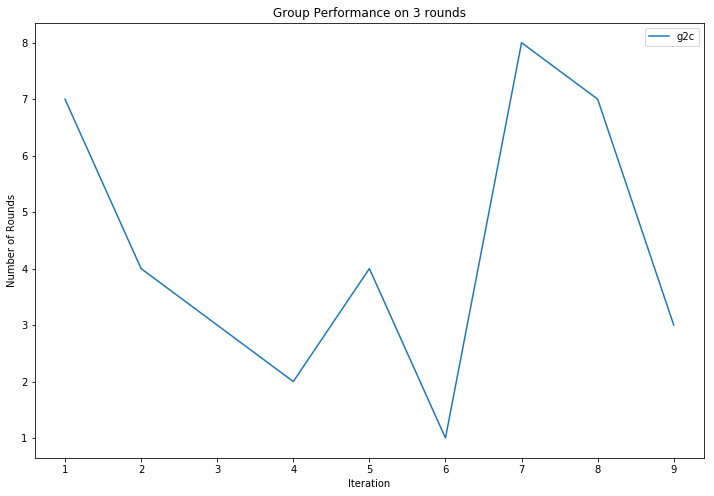

Group averages
Mean for group g2c: 4.333333333333333
Mean for group g5c: 5.222222222222222
Mean for group g7c: 15.88888888888889
Mean for group g8c: 5.444444444444445
Mean for group g9c: 5.555555555555555


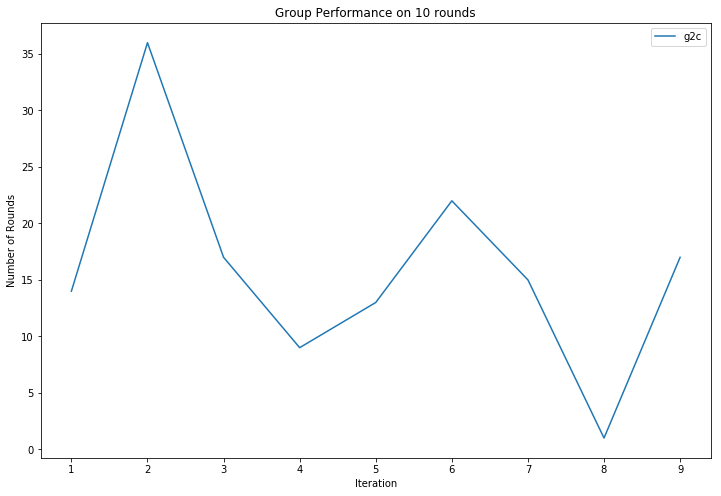

Group averages
Mean for group g2c: 16.0
Mean for group g5c: 63.44444444444444
Mean for group g7c: 15.555555555555555
Mean for group g8c: 26.444444444444443
Mean for group g9c: 22.555555555555557


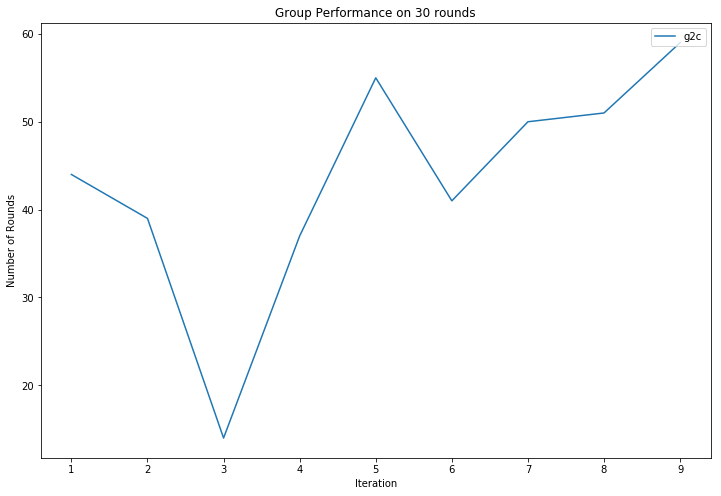

Group averages
Mean for group g2c: 43.333333333333336
Mean for group g5c: 62.22222222222222
Mean for group g7c: 55.666666666666664
Mean for group g8c: 48.0
Mean for group g9c: 41.22222222222222


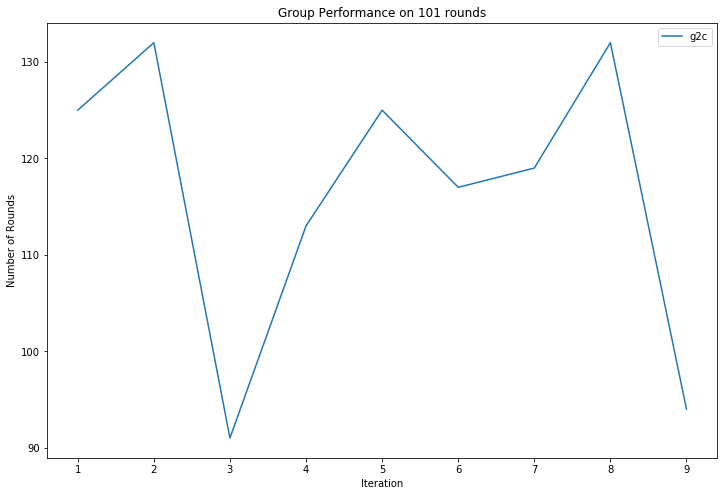

Group averages
Mean for group g2c: 116.44444444444444
Mean for group g5c: 139.11111111111111
Mean for group g7c: 130.22222222222223
Mean for group g8c: 148.77777777777777
Mean for group g9c: 150.11111111111111


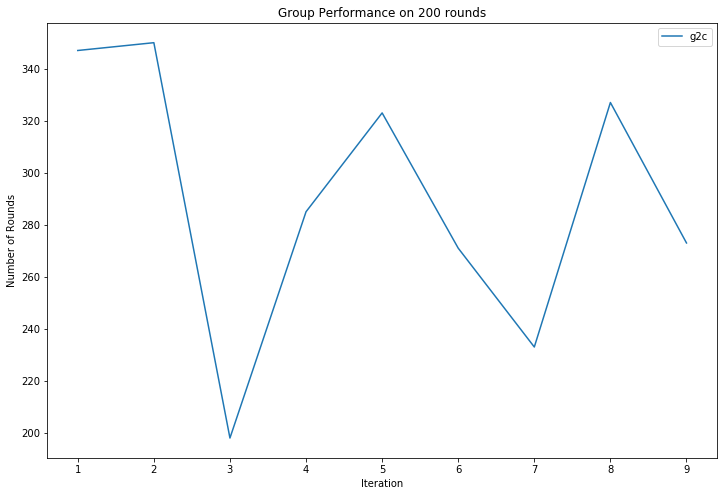

Group averages
Mean for group g2c: 289.6666666666667
Mean for group g5c: 286.3333333333333
Mean for group g7c: 248.22222222222223
Mean for group g8c: 252.33333333333334
Mean for group g9c: 261.55555555555554


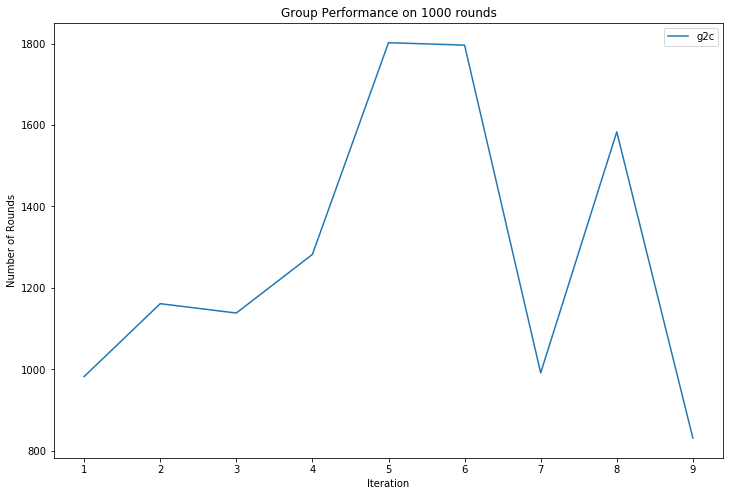

Group averages
Mean for group g2c: 1285.111111111111
Mean for group g5c: 1399.0
Mean for group g7c: 1208.111111111111
Mean for group g8c: 1412.4444444444443
Mean for group g9c: 1214.4444444444443


In [5]:

# nRounds = '3'
# resultsDict = resultsDictC
# width = 20
# height = 20
def plotGroupPerformance(nRounds, resultsDict, yLims = None):
    plt.plot(np.arange(1, 10), resultsDictC['g2c'][nRounds], '-', label='g2c')
#     plt.plot(np.arange(1, 10), resultsDictC['g5c'][nRounds], '-', label='g5c')
#     plt.plot(np.arange(1, 10), resultsDictC['g7c'][nRounds], '-', label='g7c')
#     plt.plot(np.arange(1, 10), resultsDictC['g8c'][nRounds], '-', label='g8c')
#     plt.plot(np.arange(1, 10), resultsDictC['g9c'][nRounds], '-', label='g9c')
    plt.legend(loc='upper right')
    plt.ylabel('Number of Rounds')
    plt.xlabel('Iteration')
    plt.title('Group Performance on {} rounds'.format(nRounds))
    if yLims is not None:
        plt.ylim(yLims)
    plt.show()
    print('Group averages')
    for group in ['g2c', 'g5c', 'g7c', 'g8c', 'g9c']:
        print('Mean for group {}: {}'.format(group, np.mean(resultsDictC[group][nRounds])))
# plotGroupPerformance(nRounds = '3', resultsDict = resultsDictC, yLims = [0, 20])
# plotGroupPerformance(nRounds = '10', resultsDict = resultsDictC, yLims = [0, 50])
# plotGroupPerformance(nRounds = '30', resultsDict = resultsDictC, yLims = [0, 75])
# plotGroupPerformance(nRounds = '101', resultsDict = resultsDictC, yLims = [0, 200])
plotGroupPerformance(nRounds = '3', resultsDict = resultsDictC, yLims = None)
plotGroupPerformance(nRounds = '10', resultsDict = resultsDictC, yLims = None)
plotGroupPerformance(nRounds = '30', resultsDict = resultsDictC, yLims = None)
plotGroupPerformance(nRounds = '101', resultsDict = resultsDictC, yLims = None)
plotGroupPerformance(nRounds = '200', resultsDict = resultsDictC, yLims = None)
plotGroupPerformance(nRounds = '1000', resultsDict = resultsDictC, yLims = None)

# Analysis 
After looking at the means and our performance, I think looking at the first two runs of n = 200 would be good to see what kind of patterns there are in our performance.

In [4]:
poorRunFile = "c/['g2c']_200_2"
goodRunFile = "c/['g2c']_200_3"

In [19]:
def createResultsMat(runFilePath):
#     print(runFilePath)
    with open(runFilePath, 'r') as runFile:
        lines = runFile.readlines()
#         print(print(lines[-1]))
#         print(lines[-1].split()[1])
        nRounds = int(lines[-1].split()[1])
#         print(nRounds)
#     return(0)
    n = 200
    handlePlayerMat = np.zeros([n, n, nRounds]) # for each round we have a 
#     print('Opening file: ' + runFilePath)
    with open(runFilePath, 'r') as runFile:
        next(runFile)
        currRound = -1
    #     counter = 0
        for line in runFile:
#             print(line)
    #         if "Attempting" == line[0:10] or "Scores" == line[0:6] or line == '':
    #             continue
            if "Attempting" == line[0:10] or "Scores" in line or line == '':
                continue
            if "Round" == line[0:5]:
#                 print(line)
                currRound = int(line.split()[1])
                continue
            handlePlayerInfo = [int(s) for s in line.split() if s.isdigit()]
            if len(handlePlayerInfo) == 2:
                player = handlePlayerInfo[0]
                handle = handlePlayerInfo[1]
                handlePlayerMat[handle-1, player-1, currRound-1] = 1
    return(handlePlayerMat)
# handlePlayerMatC = createResultsMat(runFilePath = poorRunFile)
# handlePlayerMatI = createResultsMat(runFilePath = goodRunFile)


def calculateAvgStragglers(handlePlayerMats):
#     print('need a way of calculating the number of avg stragglers per round.')
#     print('maybe better to go for number of contested handles per round')
#     for roundMat in groupCollisionInfo['g2c']['handlePlayerMats']:
    #     roundMat = groupCollisionInfo['g2c']['handlePlayerMats'][0]
#         print(roundMat.shape)
    rowSum = np.sum(handlePlayerMats, axis = 1)
#         print(rowSum.shape)
#         print(rowSum)
    collisions = rowSum > 1
    collisions = collisions.astype(int)
    collisionsPerTurn = collisions.sum(axis = 0)
#         print(collisionsPerTurn)
    return(collisionsPerTurn)

def getAvgCollisions(numRoundsEachIter, groupAvgCollisionsByRound):
    maxRounds = np.max(numRoundsEachIter)
    # oldGroupAvgCollisionsByRound = groupAvgCollisionsByRound
    overallAvgCollisions = np.zeros(maxRounds)
    for idx, collisionArray in enumerate(groupAvgCollisionsByRound):
    #     print(idx)
    #     zeroPads = np.zeros()
        collisionArray = np.pad(collisionArray, ((0,maxRounds - len(collisionArray))), mode='constant', constant_values=0)
        groupAvgCollisionsByRound[idx] = collisionArray
        overallAvgCollisions += collisionArray
    # np.pad(a, (2,3), 'constant', constant_values=(4, 6))
    # np.pad()


    numRoundsEachIter.sort(reverse = False)
    nextRound = numRoundsEachIter[0]
    prevRound = 0
    for idx, currround in enumerate(numRoundsEachIter):
        denom = len(numRoundsEachIter) - idx
        print('{} to {} dividing by {}'.format(prevRound, currround, denom))
        overallAvgCollisions[(prevRound):currround] = overallAvgCollisions[(prevRound):currround]/(denom)
        prevRound = currround
    # temp = np.array(overallAvgCollisions)
    overallAvgCollisions = np.round(overallAvgCollisions, decimals = 2)
    return(overallAvgCollisions)


def compareAvgCollisions(n = 200):
    """
    Iterate through all plays of nRounds and collect all mats for each team
    Then get avg number of stragglers at each round
    TODO:
        1) Need to run through and check that all returns are correct.
            1.1) Do the averages in groupOverallAvgCollisions make sens?
            1.2) Do the avg number of collisions each iteration in currIterAvgCollisions makes sense
            1.3) Check that the handle player mats make sense in handlePlayerMats
    """
    # 1) Find all files with with nRounds
    # 2) Organize files by group number
    # 3) For each group collect all matrices
         # 3.1) for each matrix get number of collisions per round
         # 3.2) avg over all rounds
    # 4) compare averages for all players
    allFiles = list(sort(glob.glob("c/*_{}_*".format(n)))) # all files with nRounds
#     print(allFiles)
    dictFunc = lambda: {'handlePlayerMats':[], 'avgCollisionsPerRound':[]}
    groupCollisionInfo = {'g2c':dictFunc(), 'g5c':dictFunc(), 'g8c':dictFunc(), 
                          'g7c':dictFunc(), 'g9c':dictFunc()}
    for groupRunFile in allFiles:
        group = re.search(r"g\dc", groupRunFile).group()
        groupCollisionInfo[group]['handlePlayerMats'].append(
            createResultsMat(runFilePath = groupRunFile))
    for group in groupCollisionInfo.keys():
        print('getting Avg collisions for group {}'.format(group))
        numRoundsEachIter = []
        groupAvgCollisionsByIteration = []
        for handlePlayerMats in groupCollisionInfo[group]['handlePlayerMats']:
            currIterAvgCollisions = calculateAvgStragglers(handlePlayerMats)
            numRoundsEachIter.append(len(currIterAvgCollisions))
            groupAvgCollisionsByIteration.append(currIterAvgCollisions)
    # I'm too tired. Right here you need to insert the code you were working on to get average over all rounds
        groupOverallAvgCollisions = getAvgCollisions(numRoundsEachIter, groupAvgCollisionsByIteration)
        groupCollisionInfo[group]['avgCollisionsPerRound'] = groupOverallAvgCollisions
        return(groupOverallAvgCollisions, groupAvgCollisionsByIteration)
        break
    
        

In [20]:
groupAvgCollisions, groupAvgCollisionsByIteration = compareAvgCollisions(n = 200)

getting Avg collisions for group g2c
0 to 198 dividing by 9
198 to 233 dividing by 8
233 to 271 dividing by 7
271 to 273 dividing by 6
273 to 285 dividing by 5
285 to 323 dividing by 4
323 to 327 dividing by 3
327 to 347 dividing by 2
347 to 350 dividing by 1


In [9]:
groupAvgCollisions

(array([ 53.44,  52.11,  52.22,  50.33,  45.11,  45.56,  39.89,  40.  ,
         33.78,  33.11,  29.67,  28.89,  26.22,  24.89,  22.78,  22.89,
         20.78,  20.11,  18.33,  18.33,  16.67,  17.11,  15.33,  15.22,
         13.89,  14.67,  12.78,  13.56,  12.44,  12.67,  11.78,  12.89,
         10.89,  11.78,   9.56,  11.67,   9.11,  11.33,   8.33,  10.67,
          8.11,  10.22,   7.56,   9.56,   7.44,   9.  ,   6.89,   7.78,
          6.78,   8.  ,   6.33,   7.67,   6.11,   7.22,   5.78,   6.67,
          5.78,   7.  ,   5.67,   6.89,   5.44,   6.78,   5.22,   6.33,
          5.22,   5.67,   4.89,   5.22,   4.67,   5.33,   4.44,   5.22,
          4.56,   4.89,   4.33,   5.  ,   4.33,   4.78,   4.33,   4.78,
          4.22,   4.89,   4.11,   4.67,   4.11,   4.56,   4.  ,   4.44,
          3.89,   4.11,   3.89,   3.89,   3.89,   3.78,   3.78,   3.89,
          3.56,   3.89,   3.56,   3.56,   3.56,   3.44,   3.44,   3.33,
          3.  ,   3.22,   3.11,   3.11,   2.78,   3.11,   2.78, 

In [278]:
printRange = np.arange(0, 10)
for groupAvg in groupAvgCollisionsByRound

TypeError: list indices must be integers or slices, not tuple

In [280]:
groupAvgCollisionsByRound

[array([59, 51, 47, 46, 43, 45, 39, 44, 30, 37, 28, 34, 24, 29, 22, 23, 18,
        21, 15, 21, 16, 21, 14, 15, 14, 17, 13, 14, 13, 14, 12, 14, 13, 13,
        10, 12, 12, 11,  9, 11,  8, 10,  9,  9,  9,  8,  7,  8,  7,  8,  7,
         8,  7,  7,  6,  6,  6,  7,  6,  6,  6,  7,  6,  7,  6,  6,  4,  5,
         4,  5,  3,  5,  3,  5,  2,  5,  3,  5,  3,  4,  3,  5,  3,  5,  3,
         5,  3,  5,  3,  4,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         2,  2,  1,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
         1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
         2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
         1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
         2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
         1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,
         2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,
         1, 

In [208]:
n = 200
allFiles = list(sort(glob.glob("c/*_{}_*".format(n)))) # all files with nRounds
dictFunc = lambda: {'handlePlayerMats':[], 'avgCollisionsPerRound':[]}
groupCollisionInfo = {'g2c':dictFunc(), 'g5c':dictFunc(), 'g8c':dictFunc(), 
                      'g7c':dictFunc(), 'g9c':dictFunc()}
for groupRunFile in allFiles:
    group = re.search(r"g\dc", groupRunFile).group()
    groupCollisionInfo[group]['handlePlayerMats'].append(
        createResultsMat(runFilePath = groupRunFile))
for group in groupCollisionInfo.keys():
    numRoundsEachIter = []
    groupAvgCollisionsByRound = []
    for handlePlayerMats in groupCollisionInfo[group]['handlePlayerMats']:
        avgCollisionsByRound = calculateAvgStragglers(handlePlayerMats)
        numRoundsEachIter.append(len(avgCollisionsByRound))
        groupAvgCollisionsByRound.append(avgCollisionsByRound)
    break

In [267]:
maxRounds = np.max(numRoundsEachIter)
# oldGroupAvgCollisionsByRound = groupAvgCollisionsByRound
overallAvgCollisions = np.zeros(maxRounds)
for idx, collisionArray in enumerate(oldGroupAvgCollisionsByRound):
#     print(idx)
#     zeroPads = np.zeros()
    collisionArray = np.pad(collisionArray, ((0,maxRounds - len(collisionArray))), mode='constant', constant_values=0)
    groupAvgCollisionsByRound[idx] = collisionArray
    overallAvgCollisions += collisionArray
# np.pad(a, (2,3), 'constant', constant_values=(4, 6))
# np.pad()


numRoundsEachIter.sort(reverse = False)
nextRound = numRoundsEachIter[0]
prevRound = 0
for idx, currround in enumerate(numRoundsEachIter):
#     print(idx)
#     1/0
    denom = len(numRoundsEachIter) - idx
    print('{} to {} dividing by {}'.format(prevRound, currround, denom))
    overallAvgCollisions[(prevRound):currround] = overallAvgCollisions[(prevRound):currround]/(denom)
    prevRound = currround
# temp = np.array(overallAvgCollisions)
overallAvgCollisions = np.round(overallAvgCollisions, decimals = 2)

In [268]:
overallAvgCollisions

array([ 481.,  469.,  470.,  453.,  406.,  410.,  359.,  360.,  304.,
        298.,  267.,  260.,  236.,  224.,  205.,  206.,  187.,  181.,
        165.,  165.,  150.,  154.,  138.,  137.,  125.,  132.,  115.,
        122.,  112.,  114.,  106.,  116.,   98.,  106.,   86.,  105.,
         82.,  102.,   75.,   96.,   73.,   92.,   68.,   86.,   67.,
         81.,   62.,   70.,   61.,   72.,   57.,   69.,   55.,   65.,
         52.,   60.,   52.,   63.,   51.,   62.,   49.,   61.,   47.,
         57.,   47.,   51.,   44.,   47.,   42.,   48.,   40.,   47.,
         41.,   44.,   39.,   45.,   39.,   43.,   39.,   43.,   38.,
         44.,   37.,   42.,   37.,   41.,   36.,   40.,   35.,   37.,
         35.,   35.,   35.,   34.,   34.,   35.,   32.,   35.,   32.,
         32.,   32.,   31.,   31.,   30.,   27.,   29.,   28.,   28.,
         25.,   28.,   25.,   28.,   25.,   28.,   25.,   27.,   25.,
         24.,   25.,   26.,   24.,   26.,   25.,   25.,   25.,   25.,
         25.,   24.,

In [269]:
numRoundsEachIter

[198, 233, 271, 273, 285, 323, 327, 347, 350]

In [270]:
numRoundsEachIter.sort(reverse = False)
nextRound = numRoundsEachIter[0]
prevRound = 0
for idx, currround in enumerate(numRoundsEachIter):
#     print(idx)
#     1/0
    denom = len(numRoundsEachIter) - idx
    print('{} to {} dividing by {}'.format(prevRound, currround, denom))
    overallAvgCollisions[(prevRound):currround] = overallAvgCollisions[(prevRound):currround]/(denom)
    prevRound = currround
# temp = np.array(overallAvgCollisions)
overallAvgCollisions = np.round(overallAvgCollisions, decimals = 2)
# np.set_printoptions(suppress=True)

0 to 198 dividing by 9
198 to 233 dividing by 8
233 to 271 dividing by 7
271 to 273 dividing by 6
273 to 285 dividing by 5
285 to 323 dividing by 4
323 to 327 dividing by 3
327 to 347 dividing by 2
347 to 350 dividing by 1


In [271]:
overallAvgCollisions

array([ 53.44,  52.11,  52.22,  50.33,  45.11,  45.56,  39.89,  40.  ,
        33.78,  33.11,  29.67,  28.89,  26.22,  24.89,  22.78,  22.89,
        20.78,  20.11,  18.33,  18.33,  16.67,  17.11,  15.33,  15.22,
        13.89,  14.67,  12.78,  13.56,  12.44,  12.67,  11.78,  12.89,
        10.89,  11.78,   9.56,  11.67,   9.11,  11.33,   8.33,  10.67,
         8.11,  10.22,   7.56,   9.56,   7.44,   9.  ,   6.89,   7.78,
         6.78,   8.  ,   6.33,   7.67,   6.11,   7.22,   5.78,   6.67,
         5.78,   7.  ,   5.67,   6.89,   5.44,   6.78,   5.22,   6.33,
         5.22,   5.67,   4.89,   5.22,   4.67,   5.33,   4.44,   5.22,
         4.56,   4.89,   4.33,   5.  ,   4.33,   4.78,   4.33,   4.78,
         4.22,   4.89,   4.11,   4.67,   4.11,   4.56,   4.  ,   4.44,
         3.89,   4.11,   3.89,   3.89,   3.89,   3.78,   3.78,   3.89,
         3.56,   3.89,   3.56,   3.56,   3.56,   3.44,   3.44,   3.33,
         3.  ,   3.22,   3.11,   3.11,   2.78,   3.11,   2.78,   3.11,
      

In [217]:
overallAvgCollisions[(350-1):350]

array([ 0.])

In [100]:
for roundMat in groupCollisionInfo['g2c']['handlePlayerMats']:
#     roundMat = groupCollisionInfo['g2c']['handlePlayerMats'][0]
    print(roundMat.shape)
    rowSum = np.sum(roundMat, axis = 1)
    print(rowSum.shape)
    print(rowSum)
    collisions = rowSum > 1
    collisions = collisions.astype(int)
    collisionsPeTurn = collisions.sum(axis = 0)
    print(collisionsPeTurn)
    1/0

(200, 200, 347)
(200, 347)
[[ 0.  0.  1. ...,  1.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  0.  2. ...,  1.  1.  1.]
 [ 1.  1.  4. ...,  1.  1.  1.]
 [ 1.  1.  2. ...,  1.  1.  1.]]
[59 51 47 46 43 45 39 44 30 37 28 34 24 29 22 23 18 21 15 21 16 21 14 15 14
 17 13 14 13 14 12 14 13 13 10 12 12 11  9 11  8 10  9  9  9  8  7  8  7  8
  7  8  7  7  6  6  6  7  6  6  6  7  6  7  6  6  4  5  4  5  3  5  3  5  2
  5  3  5  3  4  3  5  3  5  3  5  3  5  3  4  3  4  3  3  3  3  3  3  3  3
  3  3  2  2  1  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1 

ZeroDivisionError: division by zero

In [74]:
rowSum[:,1]

array([ 0.,  1.,  1.,  0.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  3.,  0.,  0.,  1.,  3.,
        0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  3.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        2.,  0.,  1.,  0.,  0.,  2.,  3.,  1.,  2.,  0.,  0.,  1.,  1.,
        1.,  0.,  3.,  1.,  0.,  3.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,
        3.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  2.,  0.,  2.,  0.,  1.,
        1.,  2.,  2.,  0.,  1.,  0.,  1.,  1.,  3.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        0.,  0.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  3.,  2.,  0.,
        0.,  2.,  3.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,
        0.,  0.,  0.,  2.,  0.,  2.,  1.,  2.,  1.,  3.,  1.,  0.,  3.,
        0.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  1.,  4.,
        3.,  2.,  1.,  2.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1

In [75]:
collisions[:,1]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [76]:
temp = np.sum(collisions)

In [77]:
temp

1594

In [84]:
print(len(collisions.sum(axis = 0)))
print(collisions.sum(axis = 0))

347
[59 51 47 46 43 45 39 44 30 37 28 34 24 29 22 23 18 21 15 21 16 21 14 15 14
 17 13 14 13 14 12 14 13 13 10 12 12 11  9 11  8 10  9  9  9  8  7  8  7  8
  7  8  7  7  6  6  6  7  6  6  6  7  6  7  6  6  4  5  4  5  3  5  3  5  2
  5  3  5  3  4  3  5  3  5  3  5  3  5  3  4  3  4  3  3  3  3  3  3  3  3
  3  3  2  2  1  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  

In [91]:
for myMat in collisions.T:
    print(myMat.sum())
    1/0

59


ZeroDivisionError: division by zero

In [94]:
collisions[:,1].sum()

51